# Fuel Cell Portfolio Risk and Returns 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
# input
# 4 Fuel Cell
symbols = ['FCEL','PLUG','BLDP','BE']
start = '2019-01-01'
end = '2020-12-22'

In [4]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [6]:
number_of_years = delta.years

In [7]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

23

In [8]:
days = (df.index[-1] - df.index[0]).days
days

719

In [9]:
df.head()

,FCEL,PLUG,BLDP,BE
Date,,,,
2019-01-02,6.84,1.33,2.71,10.12
2019-01-03,6.60,1.26,2.77,10.47
2019-01-04,6.72,1.34,2.98,11.83
2019-01-07,6.96,1.53,3.17,12.41
2019-01-08,7.08,1.60,3.18,12.73


In [10]:
df.tail()

,FCEL,PLUG,BLDP,BE
Date,,,,
2020-12-15,8.14,28.469999,19.389999,26.420000
2020-12-16,8.45,28.459999,19.639999,25.879999
2020-12-17,8.66,30.570000,20.480000,26.330000
2020-12-18,9.30,31.629999,21.180000,26.309999
2020-12-21,9.38,32.369999,20.790001,27.549999


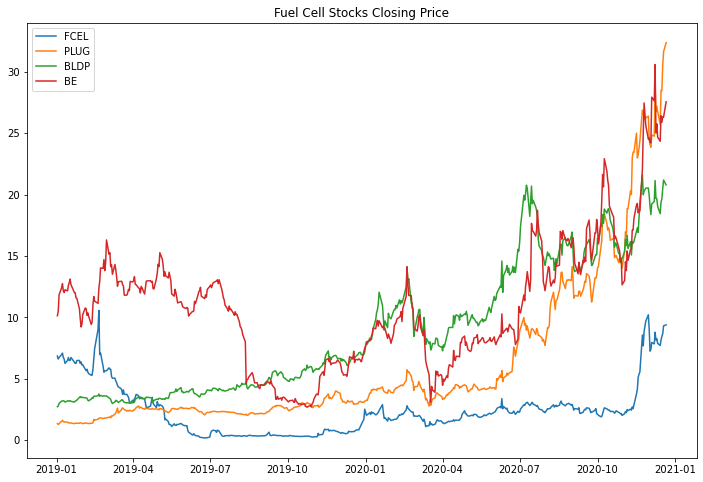

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Fuel Cell Stocks Closing Price')
plt.legend(labels=df.columns)

In [12]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

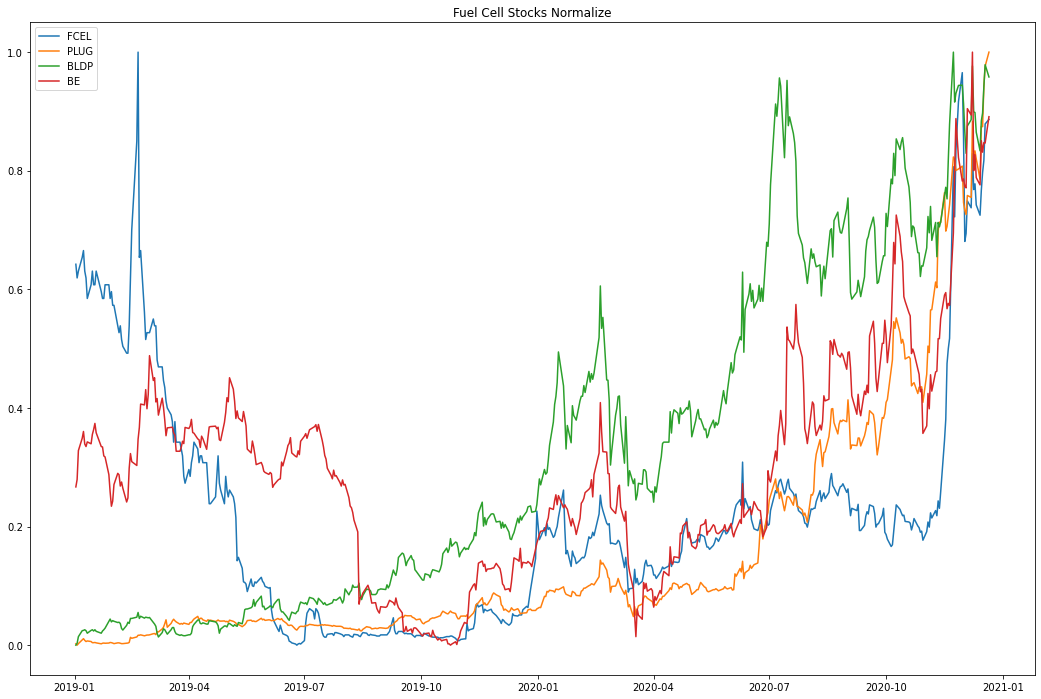

In [13]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Fuel Cell Stocks Normalize')
plt.legend(labels=normalize.columns)

In [14]:
stock_rets = df.pct_change().dropna()

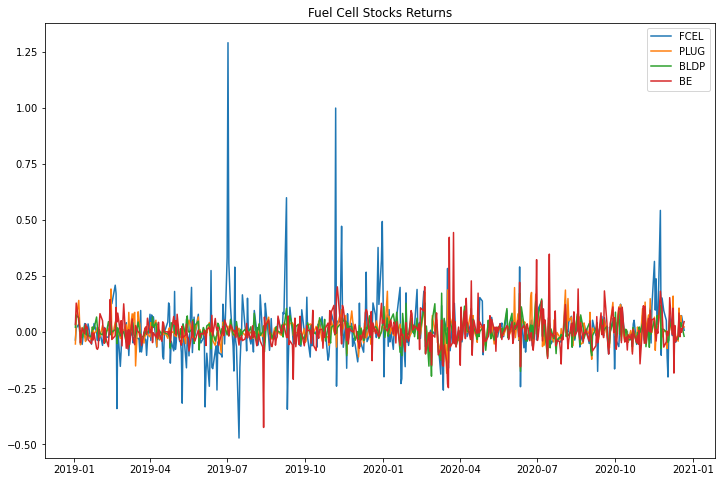

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Fuel Cell Stocks Returns')
plt.legend(labels=stock_rets.columns)

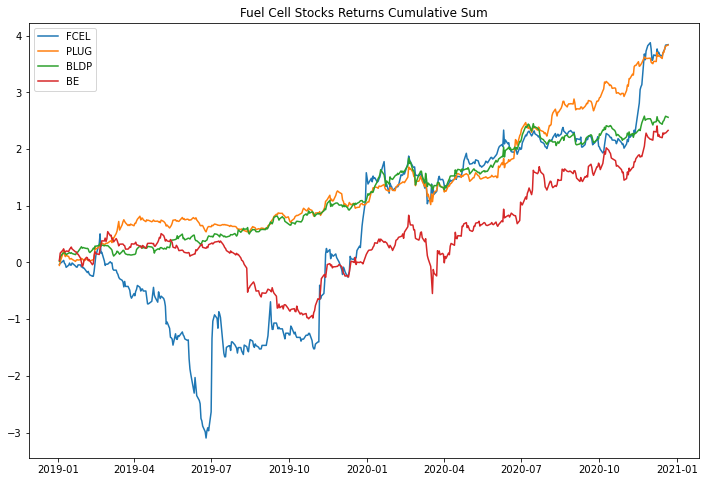

In [16]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

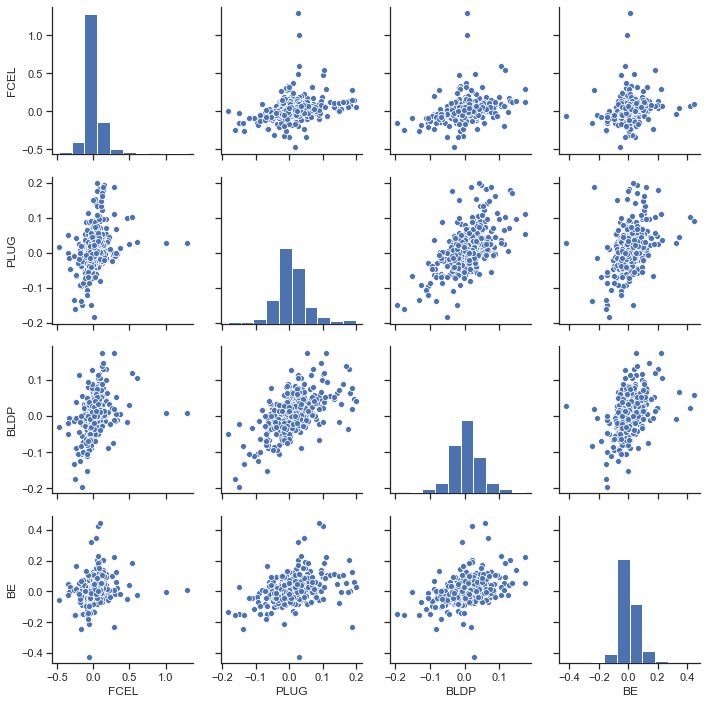

In [17]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

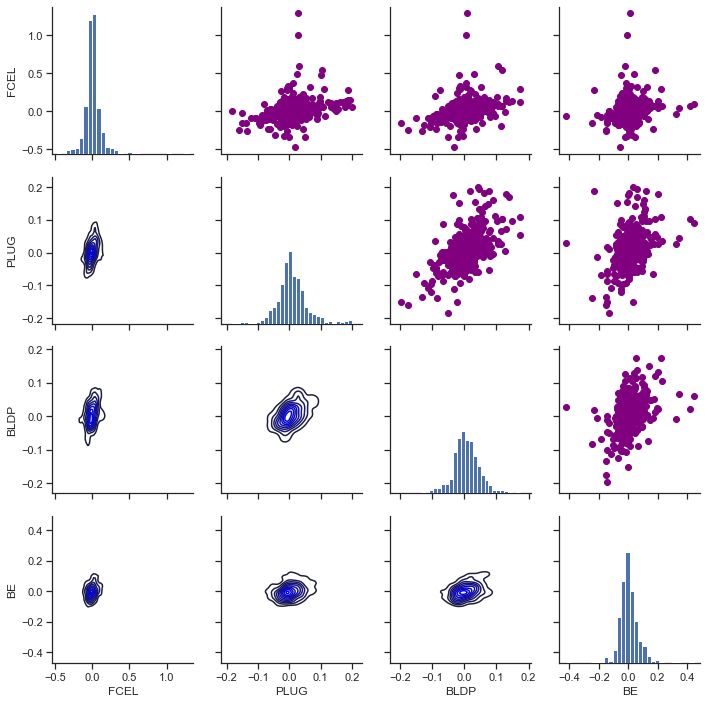

In [18]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

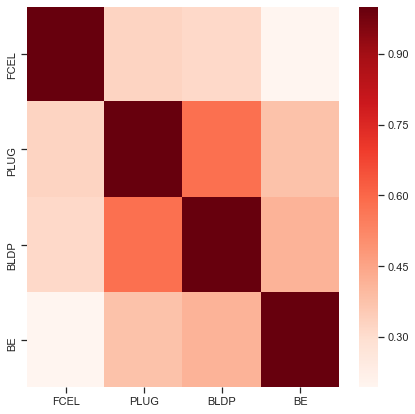

In [19]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

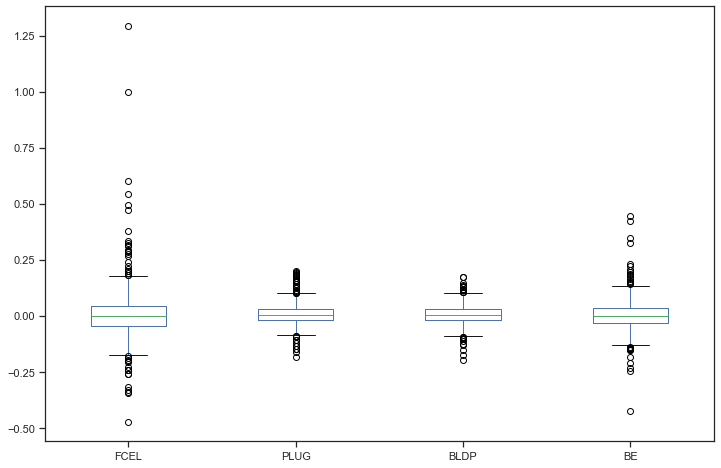

In [20]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

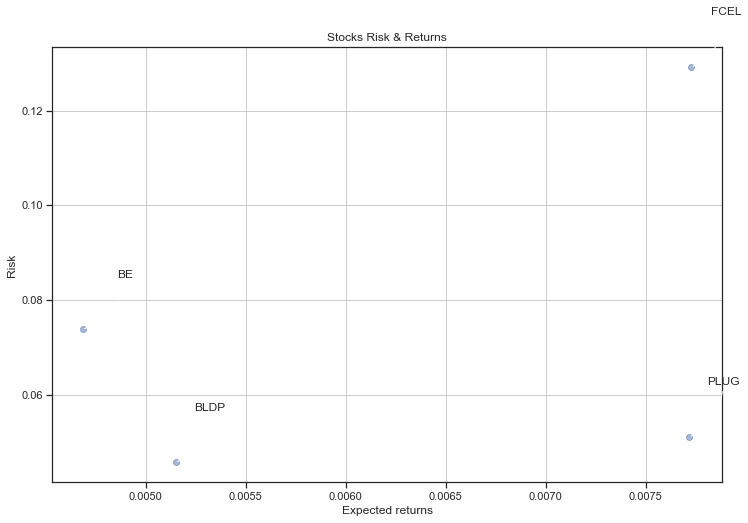

In [21]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

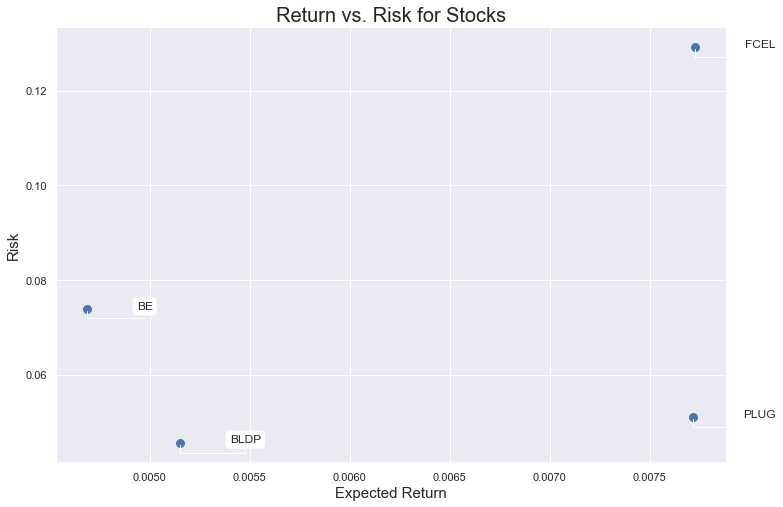

In [22]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [23]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BE    BE      1.000000
BLDP  BLDP    1.000000
PLUG  PLUG    1.000000
FCEL  FCEL    1.000000
BLDP  PLUG    0.583591
PLUG  BLDP    0.583591
BE    BLDP    0.414691
BLDP  BE      0.414691
BE    PLUG    0.377969
PLUG  BE      0.377969
      FCEL    0.328346
FCEL  PLUG    0.328346
BLDP  FCEL    0.315060
FCEL  BLDP    0.315060
BE    FCEL    0.193360
FCEL  BE      0.193360
dtype: float64

In [24]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,FCEL,PLUG,BLDP,BE
Date,,,,
2019-01-03,0.247824,0.341986,0.589592,0.528423
2019-01-04,0.278024,0.645599,0.734531,0.638008
2019-01-07,0.287964,0.850317,0.701980,0.545029
2019-01-08,0.277491,0.599216,0.538322,0.518305
2019-01-09,0.238890,0.332526,0.546787,0.435368


In [25]:
Normalized_Value.corr()

,FCEL,PLUG,BLDP,BE
FCEL,1.000000,0.328346,0.315060,0.193360
PLUG,0.328346,1.000000,0.583591,0.377969
BLDP,0.315060,0.583591,1.000000,0.414691
BE,0.193360,0.377969,0.414691,1.000000


In [26]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BE    BE      1.000000
BLDP  BLDP    1.000000
PLUG  PLUG    1.000000
FCEL  FCEL    1.000000
BLDP  PLUG    0.583591
PLUG  BLDP    0.583591
BE    BLDP    0.414691
BLDP  BE      0.414691
BE    PLUG    0.377969
PLUG  BE      0.377969
      FCEL    0.328346
FCEL  PLUG    0.328346
BLDP  FCEL    0.315060
FCEL  BLDP    0.315060
BE    FCEL    0.193360
FCEL  BE      0.193360
dtype: float64

In [27]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
FCEL    0.007728
PLUG    0.007717
BLDP    0.005150
BE      0.004684
dtype: float64
--------------------------------------------------
Stock risks:
FCEL    0.129199
PLUG    0.051032
BLDP    0.045654
BE      0.073768
dtype: float64


In [28]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
BE,0.004684,0.073768
BLDP,0.005150,0.045654
PLUG,0.007717,0.051032
FCEL,0.007728,0.129199


In [29]:
table.sort_values(by='Risk')

,Returns,Risk
BLDP,0.005150,0.045654
PLUG,0.007717,0.051032
BE,0.004684,0.073768
FCEL,0.007728,0.129199


In [30]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
FCEL,0.007728,0.129199,0.052072
PLUG,0.007717,0.051032,0.131632
BLDP,0.005150,0.045654,0.090897
BE,0.004684,0.073768,0.049945


In [31]:
table['Max Returns'] = rets.max()

In [32]:
table['Min Returns'] = rets.min()

In [33]:
table['Median Returns'] = rets.median()

In [34]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
FCEL,0.007728,0.129199,0.052072,1.291667,-0.472222,0.000000,0.860214
PLUG,0.007717,0.051032,0.131632,0.199041,-0.183432,0.001465,2.339550
BLDP,0.005150,0.045654,0.090897,0.174118,-0.196191,0.002915,-1.841357
BE,0.004684,0.073768,0.049945,0.444730,-0.425000,-0.002473,4.713036


In [35]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
FCEL,0.007728,0.129199,0.052072,1.291667,-0.472222,0.000000,0.860214,0.000012
PLUG,0.007717,0.051032,0.131632,0.199041,-0.183432,0.001465,2.339550,0.000032
BLDP,0.005150,0.045654,0.090897,0.174118,-0.196191,0.002915,-1.841357,-0.000026
BE,0.004684,0.073768,0.049945,0.444730,-0.425000,-0.002473,4.713036,0.000064


In [36]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
FCEL,0.007728,0.129199,0.052072,1.291667,-0.472222,0.000000,0.860214,0.000012,0.117038
PLUG,0.007717,0.051032,0.131632,0.199041,-0.183432,0.001465,2.339550,0.000032,2.061094
BLDP,0.005150,0.045654,0.090897,0.174118,-0.196191,0.002915,-1.841357,-0.000026,1.042399
BE,0.004684,0.073768,0.049945,0.444730,-0.425000,-0.002473,4.713036,0.000064,0.420500


In [37]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BLDP,0.005150,0.045654,0.090897,0.174118,-0.196191,0.002915,-1.841357,-0.000026,1.042399
FCEL,0.007728,0.129199,0.052072,1.291667,-0.472222,0.000000,0.860214,0.000012,0.117038
PLUG,0.007717,0.051032,0.131632,0.199041,-0.183432,0.001465,2.339550,0.000032,2.061094
BE,0.004684,0.073768,0.049945,0.444730,-0.425000,-0.002473,4.713036,0.000064,0.420500
